In [1]:
from google.colab import files


uploaded = files.upload()


Saving train.csv to train.csv
Saving test.csv to test.csv
Saving gender_submission.csv to gender_submission.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn import metrics

from sklearn import preprocessing

from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.classifier import ClassificationReport
from yellowbrick.classifier import ROCAUC
plt.style.use('ggplot')

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [6]:
dataset = pd.read_csv('train.csv')
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
dataset.describe(include = "all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [8]:
dataset.shape

(891, 12)

In [9]:
dataset.isnull().sum(axis=0)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<Axes: xlabel='count', ylabel='Embarked'>

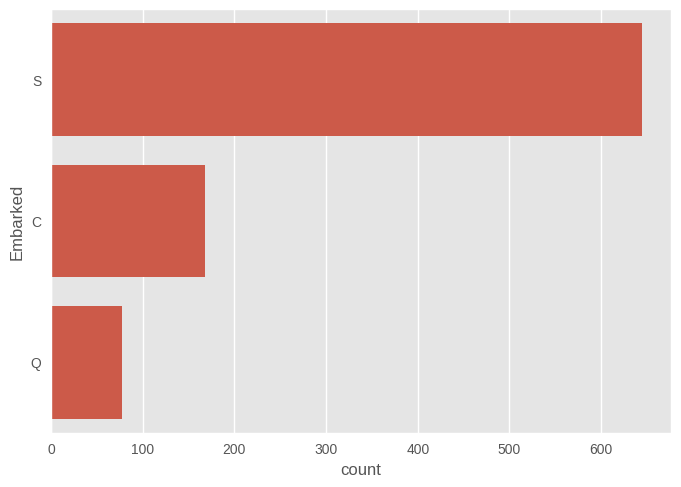

In [10]:
sns.countplot(dataset['Embarked'])

In [11]:
dataset = dataset.fillna({"Embarked": "S"})

In [12]:
dataset = pd.get_dummies(dataset, columns=['Sex'])
dataset.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_female,Sex_male
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,S,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C,True,False
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,True,False
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,S,True,False
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,S,False,True


In [13]:
dataset = pd.get_dummies(dataset, columns=['Embarked'])
dataset.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,False,True,False,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,True,False,True,False,False
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,True,False,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,True,False,False,False,True
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,False,True,False,False,True


In [14]:
feat_names = ['Pclass', 'Sex_male', 'Sex_female', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Parch', 'SibSp', 'Fare']
targ_names = ['Dead (0)', 'Survived (1)'] # 0 - Dead, 1 - Survived

train_class = dataset[['Survived']]
train_feature = dataset[feat_names]
train_feature.head()

,Pclass,Sex_male,Sex_female,Embarked_C,Embarked_Q,Embarked_S,Parch,SibSp,Fare
0,3,True,False,False,False,True,0,1,7.2500
1,1,False,True,True,False,False,0,1,71.2833
2,3,False,True,False,False,True,0,0,7.9250
3,1,False,True,False,False,True,0,1,53.1000
4,3,True,False,False,False,True,0,0,8.0500


In [15]:
clf = DecisionTreeClassifier(random_state=0)
scoring = {'acc': 'accuracy',
           'prec_macro': 'precision_macro',
           'rec_macro': 'recall_macro',
           'f1_macro': 'f1_macro'}
scores = cross_validate(clf, train_feature, train_class, cv=10, scoring=scoring)
# print(scores.keys())

print ('Accuracy score : %.3f' % scores['test_acc'].mean())
print ('Precisoin score : %.3f' % scores['test_prec_macro'].mean())
print ('Recall score : %.3f' % scores['test_rec_macro'].mean())
print ('F1 score : %.3f' % scores['test_f1_macro'].mean())

Accuracy score : 0.805
Precisoin score : 0.798
Recall score : 0.785
F1 score : 0.789


In [16]:
para_grid = {
    'min_samples_split' : range(10,500,20),
    'max_depth': range(1,20,2),
    'criterion': ("gini", "entropy")
}

clf_tree = DecisionTreeClassifier()
clf_cv = GridSearchCV(clf_tree,
                   para_grid,
                   scoring='accuracy',
                   cv=5,
                   n_jobs=-1)
clf_cv.fit(train_feature,train_class)

best_parameters = clf_cv.best_params_
print(best_parameters)

{'criterion': 'gini', 'max_depth': 11, 'min_samples_split': 50}


In [17]:
clf = clf_cv.best_estimator_
scoring = {'acc': 'accuracy',
           'prec_macro': 'precision_macro',
           'rec_macro': 'recall_macro',
           'f1_macro': 'f1_macro'}
scores = cross_validate(clf, train_feature, train_class, cv=10, scoring=scoring)
#print(scores.keys())

print ('Accuracy score : %.3f' % scores['test_acc'].mean())
print ('Precisoin score : %.3f' % scores['test_prec_macro'].mean())
print ('Recall score : %.3f' % scores['test_rec_macro'].mean())
print ('F1 score score : %.3f' % scores['test_f1_macro'].mean())

Accuracy score : 0.800
Precisoin score : 0.804
Recall score : 0.770
F1 score score : 0.778


In [18]:
X_train, X_test, y_train, y_test = train_test_split(train_feature, train_class, test_size=0.33)
print (str(X_train.shape) +","+ str(y_train.shape))
print (str(X_test.shape) +","+ str(y_test.shape))

(596, 9),(596, 1)
(295, 9),(295, 1)


In [19]:
clf2 = clf_cv.best_estimator_
clf2.fit(X_train,y_train)
predictions = clf2.predict(X_test)
print(metrics.classification_report(y_test,predictions, target_names=targ_names, digits=3))

              precision    recall  f1-score   support

    Dead (0)      0.817     0.803     0.810       178
Survived (1)      0.708     0.726     0.717       117

    accuracy                          0.773       295
   macro avg      0.763     0.765     0.764       295
weighted avg      0.774     0.773     0.773       295



/usr/local/lib/python3.10/dist-packages/yellowbrick/classifier/base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  warnings.warn(


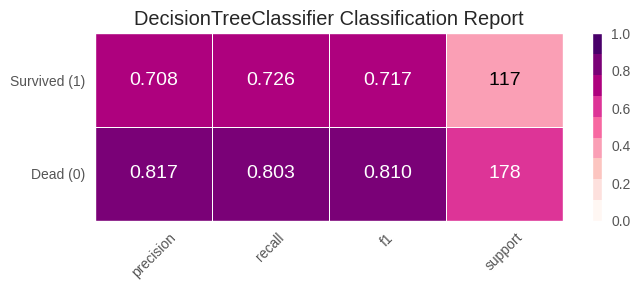

In [20]:
fig, ax = plt.subplots(figsize=(7,3))
visualizer = ClassificationReport(clf2, classes=targ_names, support=True, cmap='RdPu')
visualizer.score(X_test, y_test)
for label in visualizer.ax.texts:
    label.set_size(14)
g = visualizer.poof()

/usr/local/lib/python3.10/dist-packages/yellowbrick/classifier/base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  warnings.warn(


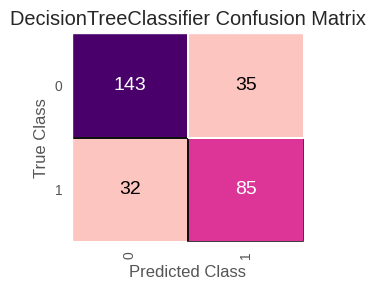

<Axes: title={'center': 'DecisionTreeClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [21]:
fig, ax = plt.subplots(figsize=(3,3))
cm = ConfusionMatrix(clf2, classes=[0, 1], cmap='RdPu')
cm.score(X_test, y_test)
for label in cm.ax.texts:
    label.set_size(14)
cm.poof()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


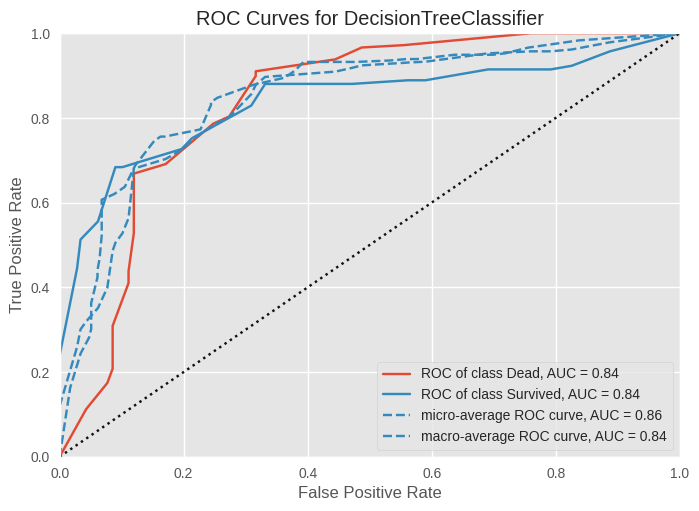

<Axes: title={'center': 'ROC Curves for DecisionTreeClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [22]:
modelviz = clf_cv.best_estimator_
visualizer = ROCAUC(modelviz, classes=["Dead", "Survived"])

visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()

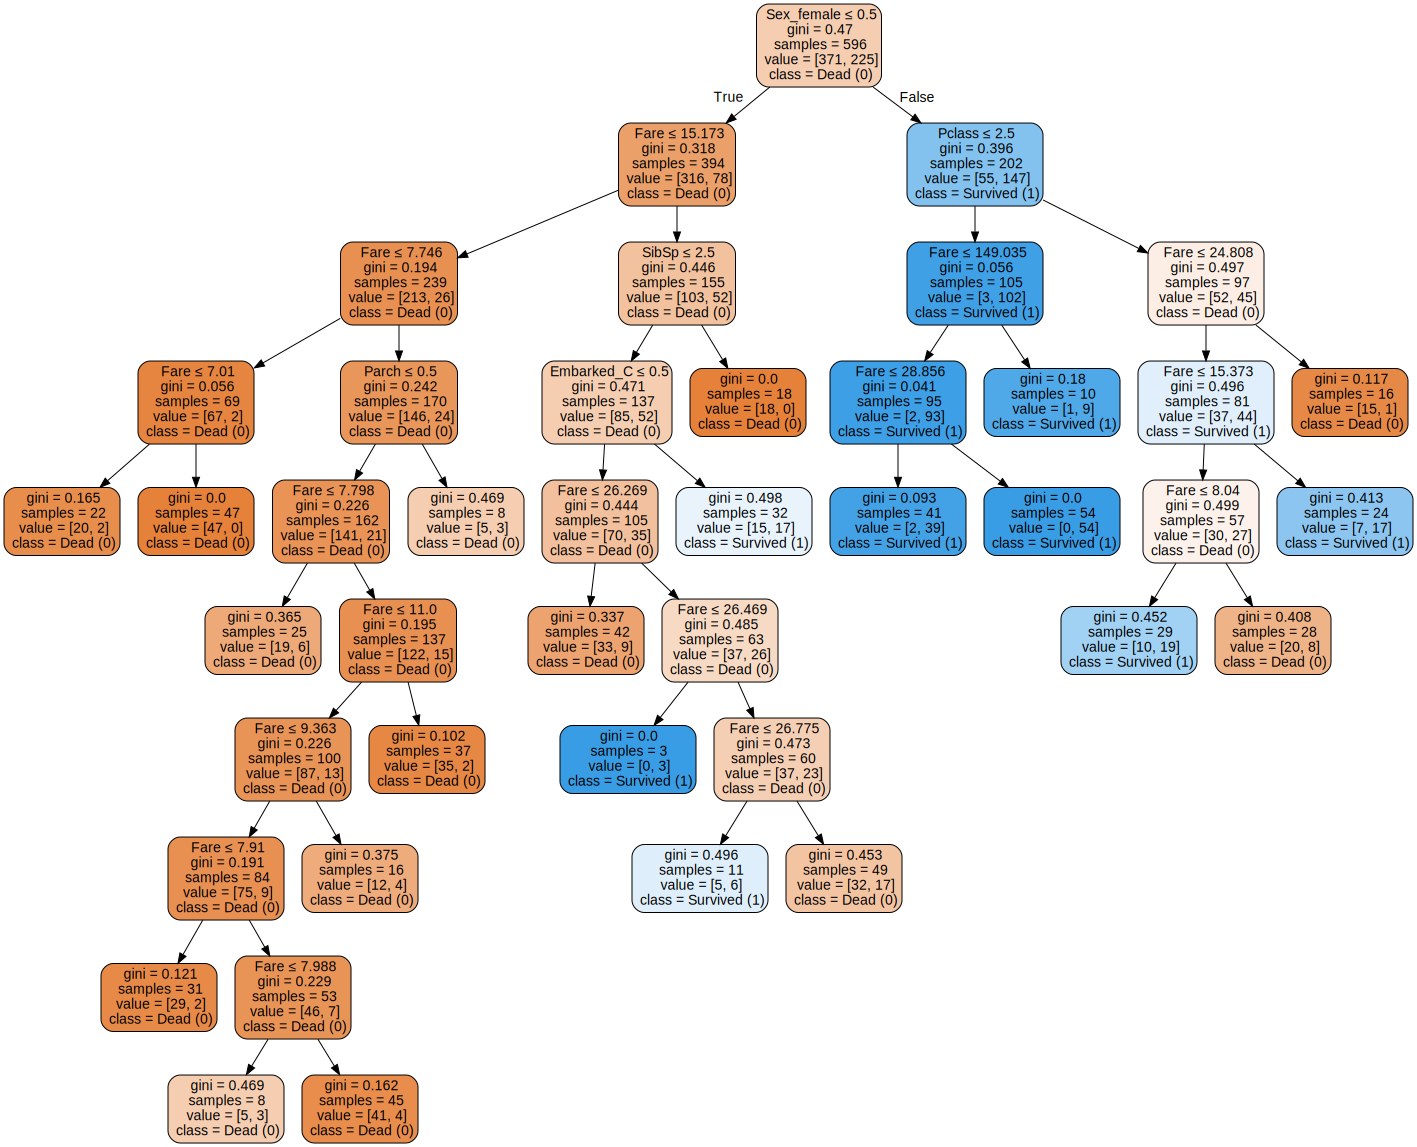

In [23]:
import graphviz
from sklearn.tree import DecisionTreeClassifier, export_graphviz

data = export_graphviz(clf,out_file=None,feature_names=feat_names,class_names=targ_names,
                         filled=True, rounded=True,
                         special_characters=True)
graph = graphviz.Source(data)
graph

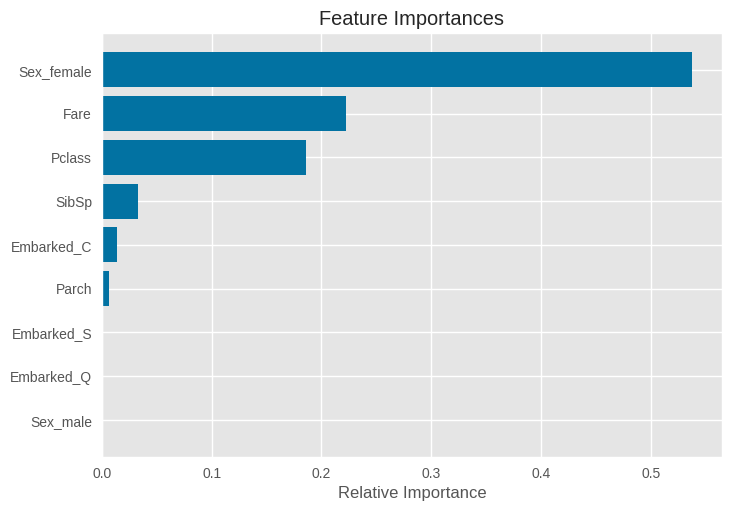

In [24]:
importances = clf.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [feat_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [25]:
test = pd.read_csv('test.csv')
clf.fit(train_feature, train_class)
meanFare = dataset['Fare'].mean()
test = test.fillna({"Fare": meanFare})
test = pd.get_dummies(test, columns=['Sex'])
test = pd.get_dummies(test, columns=['Embarked'])
ids = test['PassengerId']
test_feature = test[feat_names]
predictions = clf.predict(test_feature)
output = pd.DataFrame({ 'PassengerId' : ids, 'Survived': predictions })
output.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [26]:
output.to_csv('submission.csv', index=False)